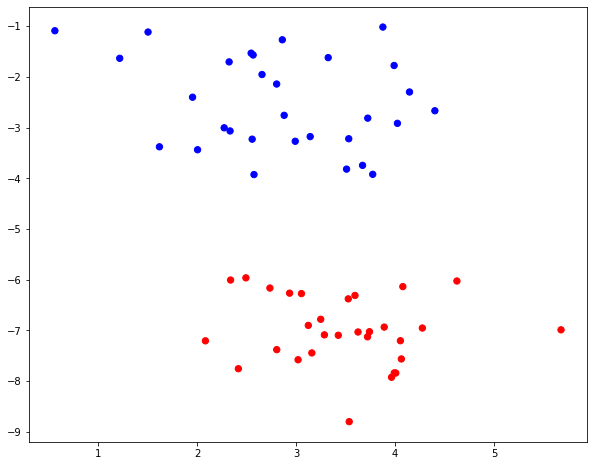

In [127]:
# 通过sklearn来生成数据
from sklearn.datasets import samples_generator
import matplotlib.pyplot as plt

#线性svm
x,y = samples_generator.make_blobs(n_samples=60,centers=2,random_state=30,cluster_std=0.8)
#样本特征集，样本标签集                样本数量      样本类型数量                 每个类别的方差
plt.figure(figsize=(10,8))
plt.scatter(x[:,0],x[:,1],c=y,s=40,cmap='bwr')

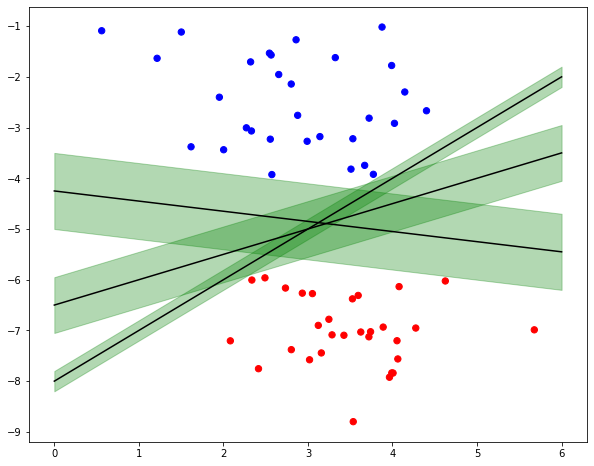

In [128]:
import numpy as np
plt.figure(figsize=(10,8))
plt.scatter(x[:,0],x[:,1],c=y,s=40,cmap='bwr')

x_temp = np.linspace(0,6)
for m,b,d in [(1,-8,0.2),(0.5,-6.5,0.55),(-0.2,-4.25,0.75)]:
    y_temp = m*x_temp+b
    plt.plot(x_temp,y_temp,'-k')
    plt.fill_between(x_temp,y_temp-d,y_temp+d,color='g',alpha=0.3)
    

In [129]:
from sklearn.svm import SVC
l_svc = SVC(kernel='linear')
l_svc.fit(x,y)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [130]:
l_svc.support_vectors_

array([[ 2.57325754, -3.92687452],
       [ 2.49156506, -5.96321164],
       [ 4.62473719, -6.02504452]])

In [131]:
def svc_plot(model): 
    ax = plt.gca()
    x = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 50)
    y = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 50)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T 
    P = model.decision_function(xy).reshape(X.shape) 
    ax.contour(X, Y, P, color='g', levels=[-1, 0, 1], linestyles=['--', '-', '--']) 

D:\anaconda\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The following kwargs were not used by contour: 'color'
  


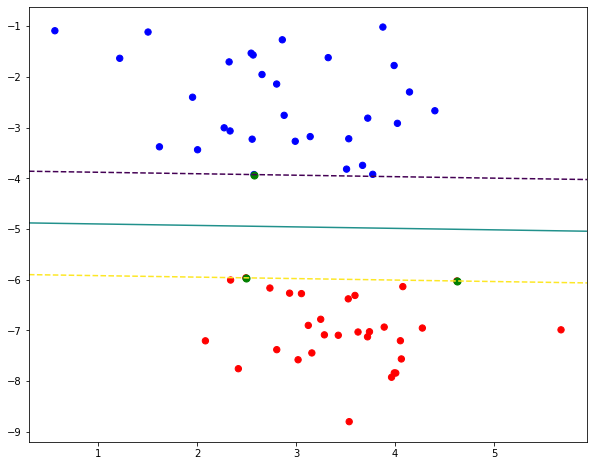

In [132]:
plt.figure(figsize=(10,8))
plt.scatter(x[:,0],x[:,1],c=y,s=40,cmap='bwr')
plt.scatter(l_svc.support_vectors_[:,0],l_svc.support_vectors_[:,1],s=50,color='g')
svc_plot(l_svc)

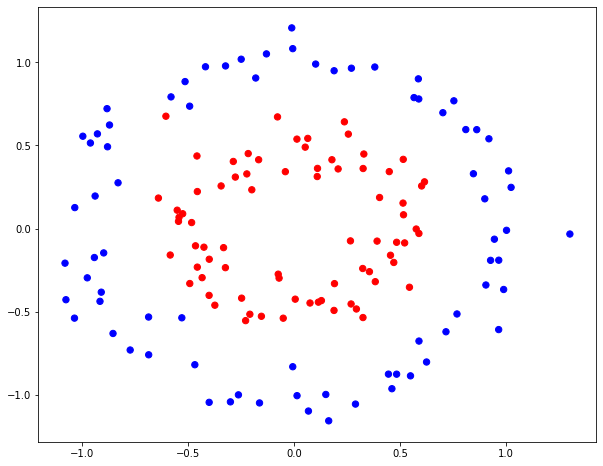

In [133]:
#讨论一下非线性svm
# 非线性的问题通过核技巧（使用核函数），将原始空间转为高维空间，从而找出解
x2,y2 = samples_generator.make_circles(150,factor=0.5,noise=0.1,random_state= 30)
plt.figure(figsize=(10,8))
plt.scatter(x2[:,0],x2[:,1],c=y2,s=40,cmap='bwr')

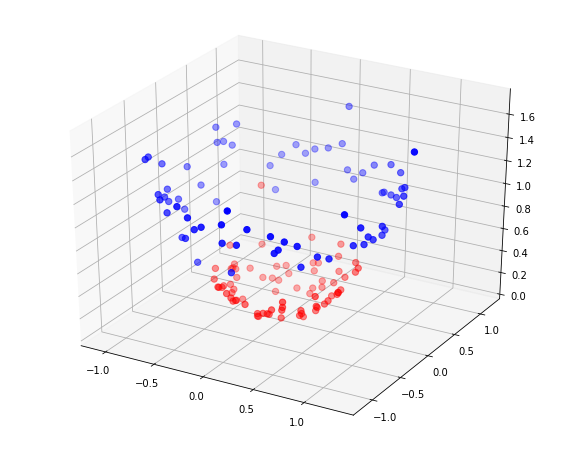

In [134]:
# 多项式核函数
def kerne_f(xi,xj):
    return xi**2+xj**2
from mpl_toolkits import mplot3d
from ipywidgets import interact,fixed
# 增加维度r
r = kerne_f(x2[:,0],x2[:,1])

plt.figure(figsize=(10,8))
ax = plt.subplot(projection='3d')
ax.scatter3D(x2[:,0],x2[:,1],r,c=y2,s=40,cmap='bwr')
#可以看到蓝点和红点之间，存在一个平面可以将他们分开

In [135]:
rbf_svc = SVC(kernel='rbf',gamma='auto')
rbf_svc.fit(x2,y2)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The following kwargs were not used by contour: 'color'
  


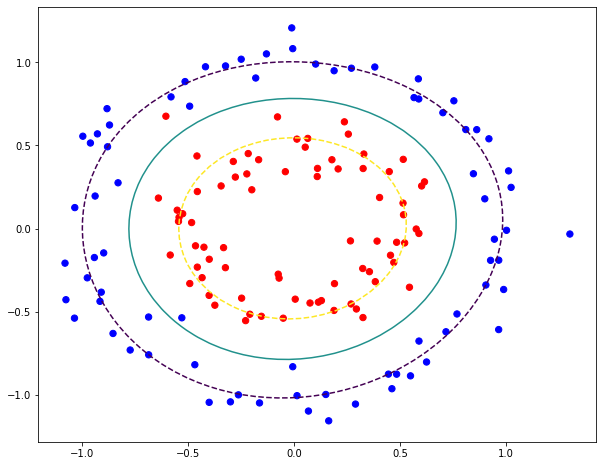

In [136]:
plt.figure(figsize=(10,8))
plt.scatter(x2[:,0],x2[:,1],c=y2,s=40,cmap='bwr')
svc_plot(rbf_svc)

In [137]:
# 二分类实践
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data 
y = iris.target
# print(x[y<2,:])
# 构造出两类（y中有0，1，2  现在只取0和1
x = x[y<2,:]
y = y[y<2]

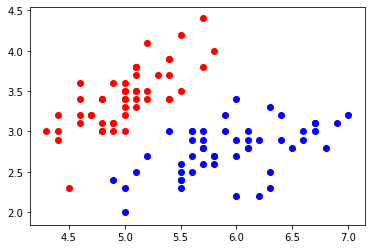

In [138]:
plt.scatter(x[y==0,0],x[y==0,1],c='r')
plt.scatter(x[y==1,0],x[y==1,1],c='b')

In [139]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std_x = std.fit_transform(x)

In [140]:
svc = SVC(kernel='linear',C=1e9)
svc.fit(std_x,y)

SVC(C=1000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)